## Семинар 4: "Сверточные сети"

ФИО: Сульженко Родион Вадимович

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from IPython.display import clear_output
%matplotlib inline

### Часть 1: Свертка

#### Одномерные сигналы
Начнем с одномерных сигналов — например, это могут быть различные временные ряды. 

<i>1.1 Реализуйте функцию, вычисляющую одномерную свертку.</i>

In [2]:
def t_convolve(signal, kernel):
    signal_convolved = np.zeros(len(signal)-len(kernel)+1)
    # 1. не забудьте перевернуть ядро!
    # 2. необходимо реализовать свертку без отступов, т.е. 
    #   размер результирующего сигнала должен быть меньше входного.
    
    for i in range(signal_convolved.shape[0]):
        signal_convolved[i] = np.sum(kernel[::-1] * signal[i:i+len(kernel)])
    
    """
    kernel_h = len(kernel) // 2
    for i in range(kernel_h, signal.shape[0] - kernel_h):
        k = i - kernel_h
        signal_convolved[k] = np.sum(kernel[::-1] * signal[i-kernel_h:i+kernel_h+1])
    """
        
    return signal_convolved

Проверим правильность реализации, сравнив с реализацией из scipy

In [3]:
from scipy.signal import convolve

signal = np.random.rand(100)
kernel = np.random.rand(5)
t_result = t_convolve(signal, kernel)
b_result = convolve(signal, kernel, mode='valid')

np.testing.assert_allclose(t_result, b_result)

Посмотрим как операция свертки может помочь нам убрать шум из сигнала

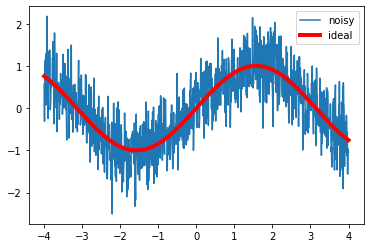

In [4]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.legend(loc=0)

Для подавления шума можно использовать усреднение значений сигнала в окрестности каждой точки (см. ЗБЧ). Вы можете убедиться, что такая операция может быть реализована при помощи свертки данных с ядром, $[\frac 1w, \frac 1w, ..., \frac 1w]$, где $w$ — размер окна.

<i>1.2  Вычислите свертку <b>зашумленного</b> сигнала с ядром $[0.2, 0.2, 0.2, 0.2, 0.2]$ </i>

In [5]:
kernel = np.ones(71)
kernel /= kernel.shape[0]

denoised_signal = convolve(noisy_signal, kernel, 'same')

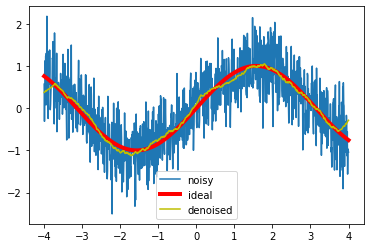

In [6]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.plot(x, denoised_signal, 'y', label='denoised')
plt.legend(loc=0)

Заметим, что уровень шума значительно снизился! Попробуйте подобрать такую ширину окна, чтобы востановленный сигнал был наиболее похож на исходный.

<i> 1.3 Подберите размер окна <i>

In [7]:
for size in range(3, 999, 2):
    kernel = np.ones(size)
    kernel /= kernel.shape[0]

    denoised_signal = convolve(noisy_signal, kernel, 'same')    
    error = ((signal - denoised_signal)**2).mean()
    
    print("ks = {}, error = {}".format(size, error))

ks = 3, error = 0.0908082802754386
ks = 5, error = 0.055333600908180285
ks = 7, error = 0.03918343477301916
ks = 9, error = 0.03091295478173872
ks = 11, error = 0.026340517656358153
ks = 13, error = 0.023130947018146233
ks = 15, error = 0.0205790134464947
ks = 17, error = 0.018570508009572214
ks = 19, error = 0.01715347488573152
ks = 21, error = 0.016145042103166182
ks = 23, error = 0.015281890616708071
ks = 25, error = 0.01457219230485206
ks = 27, error = 0.014028565302895288
ks = 29, error = 0.013518233468162834
ks = 31, error = 0.013007458784468634
ks = 33, error = 0.012506693790664726
ks = 35, error = 0.012091491270058626
ks = 37, error = 0.011728337812188211
ks = 39, error = 0.011460711708650732
ks = 41, error = 0.011186258885496535
ks = 43, error = 0.010956014117772651
ks = 45, error = 0.010790082298097107
ks = 47, error = 0.010624410821807843
ks = 49, error = 0.010428839537494515
ks = 51, error = 0.010275395826690644
ks = 53, error = 0.010142829385595097
ks = 55, error = 0.01005

ks = 921, error = 0.46281188871998247
ks = 923, error = 0.463390482836514
ks = 925, error = 0.4639590682551159
ks = 927, error = 0.46452041876881367
ks = 929, error = 0.465072806126612
ks = 931, error = 0.46561600556643506
ks = 933, error = 0.46615086762538627
ks = 935, error = 0.46667584457874445
ks = 937, error = 0.46719271219312075
ks = 939, error = 0.4677004196346986
ks = 941, error = 0.4682001945359563
ks = 943, error = 0.46869018839515114
ks = 945, error = 0.4691712193566667
ks = 947, error = 0.4696429816743
ks = 949, error = 0.4701051869925401
ks = 951, error = 0.47056178211040256
ks = 953, error = 0.4710091613176985
ks = 955, error = 0.47144919072317587
ks = 957, error = 0.4718792358442556
ks = 959, error = 0.47230344154485204
ks = 961, error = 0.47271806189083904
ks = 963, error = 0.4731265734682563
ks = 965, error = 0.47352806031048944
ks = 967, error = 0.47392195217266214
ks = 969, error = 0.47430767582683925
ks = 971, error = 0.47468633134426014
ks = 973, error = 0.47505504

#### Многомерные сигналы
Перейдем теперь к черно-белым и цветным изображениям. Для ЧБ изображений имеем двумерный сигнал, для цветных — трехмерный (высота x ширина x каналы).

Для цветных изображений количество каналов ядра обычно совпадает с количеством каналов изображения. Таким образом, в результате получается черно-белое изображение.

<i>Для вычисления многомерных сверток используйте функцию convolve из from scipy.signal import convolve</i>

In [8]:
image = plt.imread('image.jpg')

In [9]:
image.shape

(680, 960, 3)

<i>1.4 Найдите в вашей любимой поисковой системе веса каналов для перевода цветного изображения в черно-белое. Постройте фильтр, который будет переводить цветное изображение в ЧБ</i>

In [10]:
color_to_bw = np.array([0.2989, 0.5870, 0.1140])

In [11]:
arr = np.array([[[3, 3, 3], [1, 1, 1]], [[3, 3, 3], [1, 1, 1]]])

In [12]:
arr.flatten()

array([3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1])

In [13]:
image.shape

(680, 960, 3)

In [14]:
image.flatten().shape

(1958400,)

<i>1.5 На примере любого цветного изображения покажите результат его свертки с фильтром из предыдущего задания.</i>

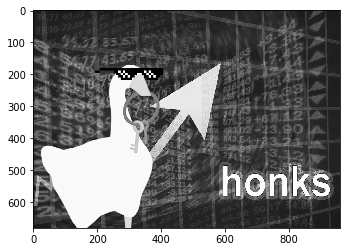

In [16]:
bw_image = convolve(image.flatten(), color_to_bw, 'same')[::3].reshape(*image.shape[:2])
#convolve(noisy_signal, kernel, 'same')
# Не забудьте, что размер bw_image должен быть [w,h], а convolve вам вернет [w,h,1]
plt.imshow(bw_image, cmap=plt.cm.Greys_r)
plt.show()

In [18]:
#plt.imshow(color_to_bw, cmap=plt.cm.Greys_r)

Операция свертки также позволяет находить границы на изображении. Для этого можно использовать, например, фильтр Собеля.

<i>1.6 Задайте ядро <a href="https://ru.wikipedia.org/wiki/Оператор_Собеля">фильтра Собеля</a> и продемонстрируйте результат его применения к любому цветному изображению.</i>

In [19]:
from scipy.signal import convolve2d

kernel = np.array([[-1, -2, -1],
                   [0,   0,  0],
                   [+1, +2, +1]])

res_y = convolve2d(bw_image, kernel.T, 'same')
res_x = convolve2d(bw_image, kernel, 'same')

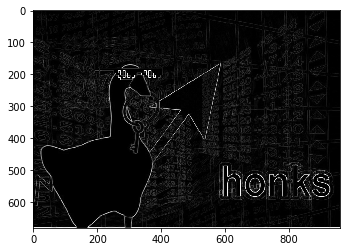

In [20]:
plt.imshow((res_x**2 + res_y**2)**0.5, cmap=plt.cm.Greys_r)
plt.show()

В сверточных нейронных сетях каждый слой использует несколько фильтров. Допустим, у нас было изображение с тремя каналами (количество входных каналов). Рассмотрим банк из четырех фильтров (количество выходных каналов). Тогда изначально будет вычислена свертка с каждым фильтром — получим 4 ЧБ изображения. Теперь соединим их в одно, интерпретируя каждое ЧБ изображение как канал цветного: RGB$\alpha$.

<i>1.7 Реализуйте операцию свертки с банком фильтров (filter bank).</i>

In [21]:
#[10, 30, 3] -> [10, 30, 4]
#[3, 3, 3, 4]

def t_convolve_bank(signal, kernel):
    assert signal.shape[-1] == kernel.shape[0]
    
    res = []
    for i in range(kernel.shape[-1]):
        r = np.zeros_like(signal[:, :, i])
        for j in range(signal.shape[-1]):
            r += convolve2d(signal[:, :, j], kernel[j, :, :, i], 'same')            
        
        res.append(r)
    
    return np.array(res).transpose((1, 2, 0))

<i>1.8 Задайте банк фильтров, меняющий порядок следования каналов с RGB на BGR.</i>

In [22]:
#RGB -> RBG

kernels = np.zeros((3, 1, 1, 3))

kernels[0, 0, 0, 2] = 1
kernels[1, 0, 0, 1] = 1
kernels[2, 0, 0, 0] = 1


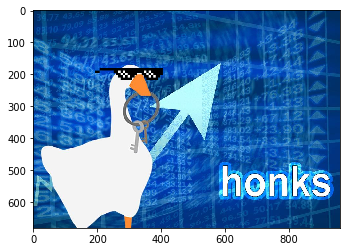

In [24]:
image = plt.imread("image.jpg") 
plt.imshow(image)
plt.show()

<i>1.9 Продемонстрируйте результат свертки любого цветного изображения с банком фильтров из предыдущего пункта.</i>

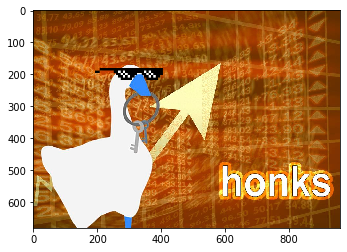

In [25]:
res_image = t_convolve_bank(image.astype(float), kernels)

plt.imshow(res_image.astype('uint8'))
plt.show()
# Не забудьте, что после свертки вы скорее всего получите тензор типа float. 
# Чтобы imshow нормально отобразил результат, надо привести его к типу uint8 (нпр., при помощи .astype('uint8'))

В процессе обучения сверточных нейронных сетей настраиваются веса элементов фильтр банка. Это позволяет не заниматься подбором коэффициентов "руками", а задавать лишь размер ядра: ширину, высоту, количество входных и выходных каналов. В итоге получаем четырехмерный массив (тензор).

### Часть 2: Пулинг

При использовании сверточных слоев принято использовать слои пулинга. Эта операция позволяет уменьшить пространственные размерности изображения и избавиться от избыточности.

<i>2.1 Реализуйте операции пулинга для цветных изображений</i>

In [26]:
def maxpool(image, w=2):
    assert(image.ndim == 3)
    
    res = np.zeros((image.shape[0] // w, image.shape[1] // w, image.shape[2]))
    for i in range(0, image.shape[0], w):
        for j in range(0, image.shape[1], w):
            for k in range(image.shape[2]):
                res[i//w, j//w, k] = np.max(image[i:i+w, j:j+w, k])
                
    return res
    

def medianpool(image, w=2):
    assert(image.ndim == 3)
    
    res = np.zeros((image.shape[0] // w, image.shape[1] // w, image.shape[2]))
    for i in range(0, image.shape[0], w):
        for j in range(0, image.shape[1], w):
            for k in range(image.shape[2]):
                res[i//w, j//w, k] = np.median(image[i:i+w, j:j+w, k])
                
    return res

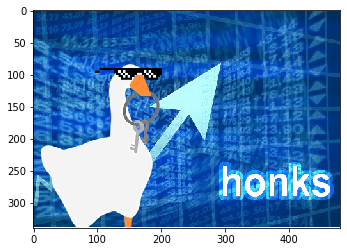

In [27]:
res_image = maxpool(image.astype(float))

plt.imshow(res_image.astype('uint8'))
plt.show()

Как и в первой части, посмотрим сначала как эта опреация влияет на цветные изображения.

<i>2.2 Взять цветное изображение и добавить к нему <a href="https://ru.wikipedia.org/wiki/Salt_and_pepper"> шум соль и перец</a>. Применить медианный пулинг и максимальный пулинг.</i>

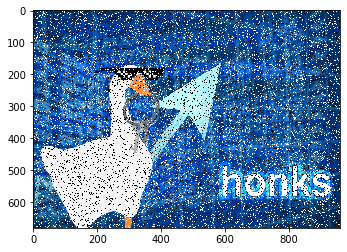

In [31]:
frac = 0.9

res_image = np.array(image)

ind = np.random.rand(*image.shape[:2]) > frac
res_image[ind, :] = 0

ind = np.random.rand(*image.shape[:2]) > frac
res_image[ind, :] = 255

plt.imshow(res_image.astype('uint8'))
plt.show()

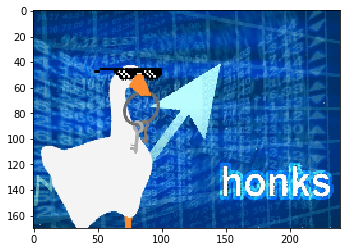

In [37]:
# Median pooling
clean_image_median = medianpool(res_image.astype(float), 4)

plt.imshow(clean_image_median.astype('uint8'))
plt.show()

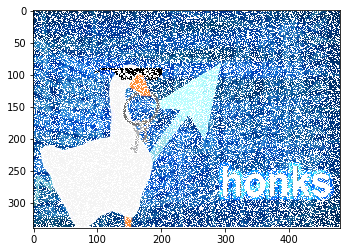

In [39]:
# Max pooling
clean_image_max = maxpool(res_image.astype(float), 2)

plt.imshow(clean_image_max.astype('uint8'))
plt.show()



<i>2.3 Какой тип пулинга лучше справился с поставленной задачей? Почему?</i>

#### Median pooling справился лучше
- Meadian pooling при подобранном размере ядра справился отлично (и соль, и перед убраны)
- Max pooling усиливает шум соли, т.к. скорее всего максимумом по окну как раз является белый пиксель. С увеличением размера окна зашумленное изображение становится полностью белым.

### Часть 3: Сверточная сеть на pyTorch

pyTorch предоставляет модули свертки и пулинга. Попробуем построить сеть и натренировать ее на данных MNIST. Для загрузки данных воспользуйтесь кодом со второго семинара.

Воспользуемся кодом с предыдущего семинара, чтобы обучить сверточную сеть на данных MNIST. Попробуем две архитектуры: 
2. input -> 8 Conv 3x3 -> ReLU -> maxpool -> 16 Conv 3x3 -> ReLU -> ravel -> Linear -> LogSoftmax
1. input -> 8 Conv 3x3 -> ReLU -> 16 Conv 3x3 -> ReLU -> maxpool -> 32 Conv 3x3 -> ravel -> Linear -> LogSoftmax

Здесь запись "c conv KxK" означает то, что на выходе должно получиться c каналов, а размер ядра — KxK

Ниже приведен пример сети. <i>(Документация: http://pytorch.org/docs/)</i>

In [40]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [41]:
# пример сверточной сети

image_size = 28
channels = 1
class ConvClassifier(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(channels, 3, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*3, 10), nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [42]:
def train(network, epochs, learning_rate):
    loss = nn.NLLLoss()
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)
    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []
    try:
        for epoch in range(epochs):
            losses = []
            accuracies = []
            for X, y in train_loader:
                network.zero_grad()
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.item())
                loss_batch.backward()
                optimizer.step()
                accuracies.append((np.argmax(prediction.data.numpy(), 1)==y.data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))
            losses = []
            accuracies = []    
            for X, y in test_loader:
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.item())
                accuracies.append((np.argmax(prediction.data.numpy(), 1)==y.data.numpy()).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))
            clear_output(True)
            print('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
                        epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                        train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(train_loss_epochs, label='Train')
            plt.plot(test_loss_epochs, label='Test')
            plt.xlabel('Epochs', fontsize=16)
            plt.ylabel('Loss', fontsize=16)
            plt.legend(loc=0, fontsize=16)
            plt.grid()
            plt.subplot(1, 2, 2)
            plt.plot(train_accuracy_epochs, label='Train accuracy')
            plt.plot(test_accuracy_epochs, label='Test accuracy')
            plt.xlabel('Epochs', fontsize=16)
            plt.ylabel('Loss', fontsize=16)
            plt.legend(loc=0, fontsize=16)
            plt.grid()
            plt.show()
    except KeyboardInterrupt:
        pass

Epoch 4... (Train/Test) NLL: 0.289/0.276	Accuracy: 0.917/0.920


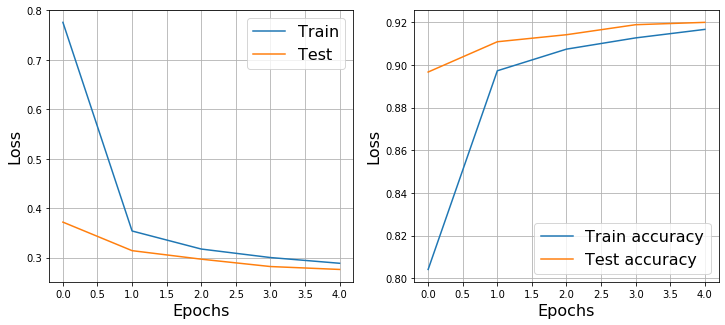

In [43]:
network = ConvClassifier(image_size=28)
train(network, 5, 1e-4)

<i>3.1 Обучите сверточные сети с архитектурами (1) и (2). Какое качество удалось получить на тестовой выборке? Какой результат получался на полносвязной нейронной сети?</i>

In [44]:
##### YOUR CODE HERE #####
# 2. input -> 8 Conv 3x3 -> ReLU -> maxpool -> 16 Conv 3x3 ->
# -> ReLU -> ravel -> Linear -> LogSoftmax

image_size = 28
channels = 1
class ConvClassifier2(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(in_channels=channels, 
                                                   out_channels=8, 
                                                   kernel_size=3, 
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(in_channels=8, 
                                                   out_channels=16,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU())
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*16, 10), 
                                           nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 4... (Train/Test) NLL: 0.074/0.065	Accuracy: 0.979/0.981


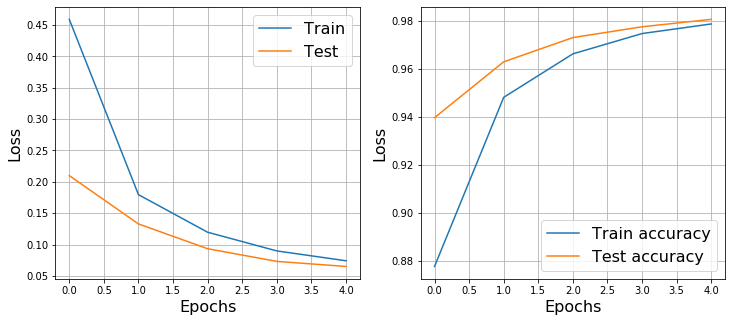

In [45]:
network = ConvClassifier2(image_size=28)
train(network, 5, 1e-4)

In [46]:
# YOUR CODE HERE #####
# 3. input -> 8 Conv 3x3 -> ReLU -> 16 Conv 3x3 -> ReLU -> 
# -> maxpool -> 32 Conv 3x3 -> ravel -> Linear -> LogSoftmax

image_size = 28
channels = 1
class ConvClassifier3(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(in_channels=channels, 
                                                   out_channels=8, 
                                                   kernel_size=3, 
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(in_channels=8, 
                                                   out_channels=16,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.Conv2d(in_channels=16,
                                                   out_channels=32,
                                                   kernel_size=3,
                                                   padding=1))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*32, 10), 
                                           nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 4... (Train/Test) NLL: 0.072/0.056	Accuracy: 0.979/0.981


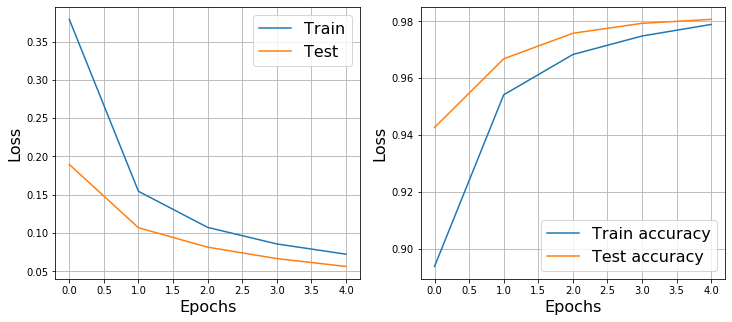

In [47]:
network = ConvClassifier3(image_size=28)
train(network, 5, 1e-4)

<i>3.2 На каких объектах сеть ошибается сильнее всего? Нарисуйте эти объекты с правильными и предсказаными метками.</i>

In [48]:
wrong_X = []
correct_y = []
predicted_y = []
logits = []
for X, y in test_loader:
    prediction = network(X).detach().numpy()
    
    for i in range(len(prediction)):
        if np.argmax(prediction[i]) != y[i]:
            wrong_X.append(X[i])
            correct_y.append(y[i])
            predicted_y.append(np.argmax(prediction[i]))
            logits.append(prediction[i][y[i]])
wrong_X = np.row_stack(wrong_X)
correct_y = np.row_stack(correct_y)[:, 0]
predicted_y = np.row_stack(predicted_y)[:, 0]
logits = np.row_stack(logits)[:, 0]

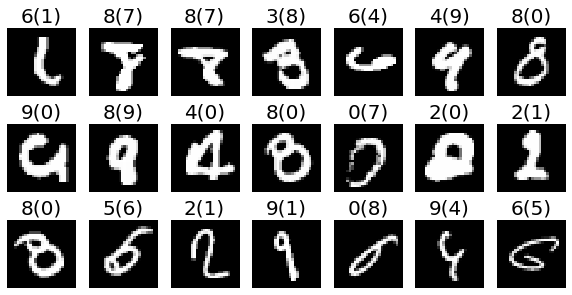

In [49]:
plt.figure(figsize=(10, 5))
order = np.argsort(logits)
for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.imshow(wrong_X[order[i]].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title('{}({})'.format(correct_y[order[i]], predicted_y[order[i]]), fontsize=20)
    plt.axis('off')

### Думаю, что сеть справляется вполне неплохо. 
### Несколько примеров:
- Первый пример и правда больше похож на единицу, а не на шестерку. 
- Пятый столбец, первая строка: пример был бы похож на шестерку, но для этого сеть должна обучаться на примерах с поворотами до 90(!) градусов
- Третья строка, второй столбец: даже человек может назвать это шестеркой, а не пятеркой.

<i>3.3 Поэкспериментируйте с различными архитектурами сверточных сетей. Смогли ли вы улучшить результат на тестовой выборке?</i>

###### Попробуем сделать сеть наподобие vgg: (2 свертки->max_pool и т.д.)

In [96]:
image_size = 28
channels = 1
class ConvClassifier_Custom1(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(in_channels=channels, 
                                                   out_channels=8, 
                                                   kernel_size=3, 
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.Conv2d(in_channels=8, 
                                                   out_channels=8, 
                                                   kernel_size=3, 
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.MaxPool2d(kernel_size=2),
                                         nn.Conv2d(in_channels=8,
                                                   out_channels=16,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.Conv2d(in_channels=16,
                                                   out_channels=16,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.MaxPool2d(kernel_size=2),
                                         nn.Conv2d(in_channels=16,
                                                   out_channels=32,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU(),
                                         #nn.MaxPool2d(kernel_size=2),
                                         nn.Conv2d(in_channels=32,
                                                   out_channels=32,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.MaxPool2d(kernel_size=2),
                                         nn.Conv2d(in_channels=32,
                                                   out_channels=64,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU(),
                                         #nn.MaxPool2d(kernel_size=2),
                                         #nn.Conv2d(in_channels=64,
                                         #          out_channels=64,
                                         #          kernel_size=5,
                                         #          padding=1),
                                         #nn.ReLU())
                                         nn.MaxPool2d(kernel_size=2))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//16*image_size//16*64, 10), 
                                           nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 19... (Train/Test) NLL: 0.019/0.035	Accuracy: 0.994/0.990


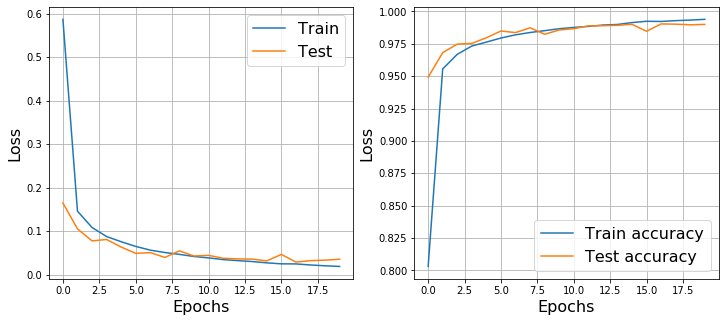

In [97]:
network = ConvClassifier_Custom1(image_size=28)
train(network, epochs=20, learning_rate=1e-4)

##### Попробуем теперь сеть с меньшим число слоев и только с одним maxpool'ом:

In [62]:
image_size = 28
channels = 1
class ConvClassifier_Custom2(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(in_channels=channels, 
                                                   out_channels=8, 
                                                   kernel_size=3, 
                                                   padding=1),
                                         nn.ReLU(),
                                         #nn.MaxPool2d(kernel_size=3),
                                         nn.Conv2d(in_channels=8,
                                                   out_channels=32,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU(),
                                         nn.MaxPool2d(kernel_size=2),
                                         nn.Conv2d(in_channels=32,
                                                   out_channels=64,
                                                   kernel_size=3,
                                                   padding=1),
                                         nn.ReLU())
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2 * 64, 10), 
                                           nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 19... (Train/Test) NLL: 0.004/0.042	Accuracy: 0.999/0.991


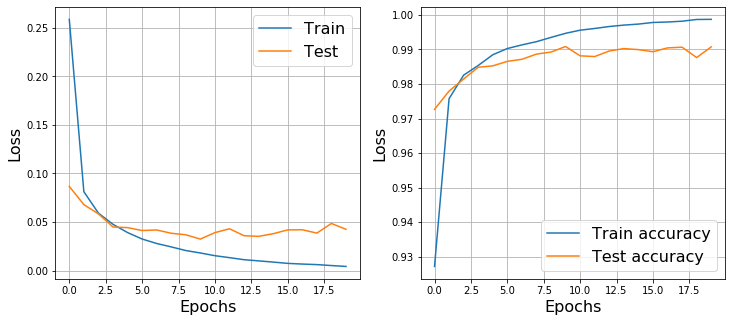

In [63]:
network = ConvClassifier_Custom2(image_size=28)
train(network, epochs=20, learning_rate=1e-4)

##### Улучшили точность до 0.991

#### Feedback (опционально)

Здесь вы можете оставить список опечаток из лекции или семинара:

- Думаю стоит добавить в презентацию слайд с подробным объяснением размерностей свертки. Довольно неочевидный момент.